## 1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import seaborn as sns
import scipy as sc

In [72]:
data = pd.read_csv('data_breast.csv')
data.drop(['Unnamed: 32'], axis='columns', inplace=True)
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

In [73]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Все переменные непрерывные, кроме целевой diagnosis (категориальная).

In [75]:
#Преобразуем целевую переменную diagnosis из категориальной в бинарную diagnosis_class.
def diagnosis_class(row):
    if row['diagnosis'] == 'M':
        return 0
    else:
        return 1

In [76]:
data['diagnosis_class'] = data.apply(diagnosis_class, axis=1)
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

        ...         texture_worst  perimeter_worst  area_worst  \
0       ...                 17.33           184.60      2019.0   
1       ...                 23.41           158.80      1956.0   
2       ...                 25.53           152.50      1709.0   
3       ...                 26.50            98.87       567.7   
4       ...                 16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis_class  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 33 columns]

In [77]:
data.diagnosis_class.value_counts()
#Классы не сильно различаются по количеству

1    357
0    212
Name: diagnosis_class, dtype: int64

Attribute Information:
1) ID number 
2) Diagnosis (M = malignant злокачественный, B = benign доброкачественный) 
3-32) 
Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) вогнутость (выраженность вогнутых участков контура)
h) concave points (number of concave portions of the contour) вогнутые точки (количество вогнутых частей контура)
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

## 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [78]:
data.drop(['id'], axis='columns', inplace=True)

In [79]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean       ...         texture_worst  \
count     569.000000              569.000000       ...            569.000000   
mean        0.181162                0.062798       ...             25.677223   
std         0.027414                0.007060       ...              6.146258   
min         0.106000                0.049960       ...             12.020000   
25%         0.161900                0.057700       ...             21.080000   
50%         0.179200                0.061540       ...             25.410000   
75%         0.195700                0.066120       ...             29.720000   
max         0.304000                0.097440       ...             49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  diagnosis_class  
count               569.000000       569.000000  
mean                  0.083946         0.627417  
std                   0.018061         0.483918  
min                   0.055040         0.000000  
25%                   0.071460         0.000000  
50%                   0.080040         1.000000  
75%                   0.092080         1.000000  
max                   0.207500         1.000000  

[8 rows x 31 columns]

In [80]:
data.mode()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          B        12.34         14.93           82.61      512.2   
1        NaN          NaN         15.70           87.76        NaN   
2        NaN          NaN         16.84          134.70        NaN   
3        NaN          NaN         16.85             NaN        NaN   
4        NaN          NaN         17.46             NaN        NaN   
5        NaN          NaN         18.22             NaN        NaN   
6        NaN          NaN         18.90             NaN        NaN   
7        NaN          NaN         19.83             NaN        NaN   
8        NaN          NaN         20.52             NaN        NaN   
9        NaN          NaN           NaN             NaN        NaN   
10       NaN          NaN           NaN             NaN        NaN   
11       NaN          NaN           NaN             NaN        NaN   
12       NaN          NaN           NaN             NaN        NaN   
13       NaN          NaN           NaN             NaN        NaN   
14       NaN          NaN           NaN             NaN        NaN   
15       NaN          NaN           NaN             NaN        NaN   
16       NaN          NaN           NaN             NaN        NaN   
17       NaN          NaN           NaN             NaN        NaN   
18       NaN          NaN           NaN             NaN        NaN   
19       NaN          NaN           NaN             NaN        NaN   
20       NaN          NaN           NaN             NaN        NaN   
21       NaN          NaN           NaN             NaN        NaN   
22       NaN          NaN           NaN             NaN        NaN   
23       NaN          NaN           NaN             NaN        NaN   
24       NaN          NaN           NaN             NaN        NaN   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.1007            0.1147             0.0                  0.0   
1               NaN            0.1206             NaN                  NaN   
2               NaN               NaN             NaN                  NaN   
3               NaN               NaN             NaN                  NaN   
4               NaN               NaN             NaN                  NaN   
5               NaN               NaN             NaN                  NaN   
6               NaN               NaN             NaN                  NaN   
7               NaN               NaN             NaN                  NaN   
8               NaN               NaN             NaN                  NaN   
9               NaN               NaN             NaN                  NaN   
10              NaN               NaN             NaN                  NaN   
11              NaN               NaN             NaN                  NaN   
12              NaN               NaN             NaN                  NaN   
13              NaN               NaN             NaN                  NaN   
14              NaN               NaN             NaN                  NaN   
15              NaN               NaN             NaN                  NaN   
16              NaN               NaN             NaN                  NaN   
17              NaN               NaN             NaN                  NaN   
18              NaN               NaN             NaN                  NaN   
19              NaN               NaN             NaN                  NaN   
20              NaN               NaN             NaN                  NaN   
21              NaN               NaN             NaN                  NaN   
22              NaN               NaN             NaN                  NaN   
23              NaN               NaN             NaN                  NaN   
24              NaN               NaN             NaN                  NaN   

    symmetry_mean       ...         texture_worst  perimeter_worst  \
0          0.1601       ...                 17.70            101.7   
1          0.

## 3. Выбрать стратегию для работы с пропущенными значениями.

Согласно data.info() пропущенных значений в датасете нет.

## 4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [81]:
corr_matrix = data.corr()
corr_matrix

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   
diagnosis_class            -0.730029     -0.415185       -0.742636  -0.708984   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se           

C:\Users\Kabanov\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Kabanov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kabanov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Kabanov\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


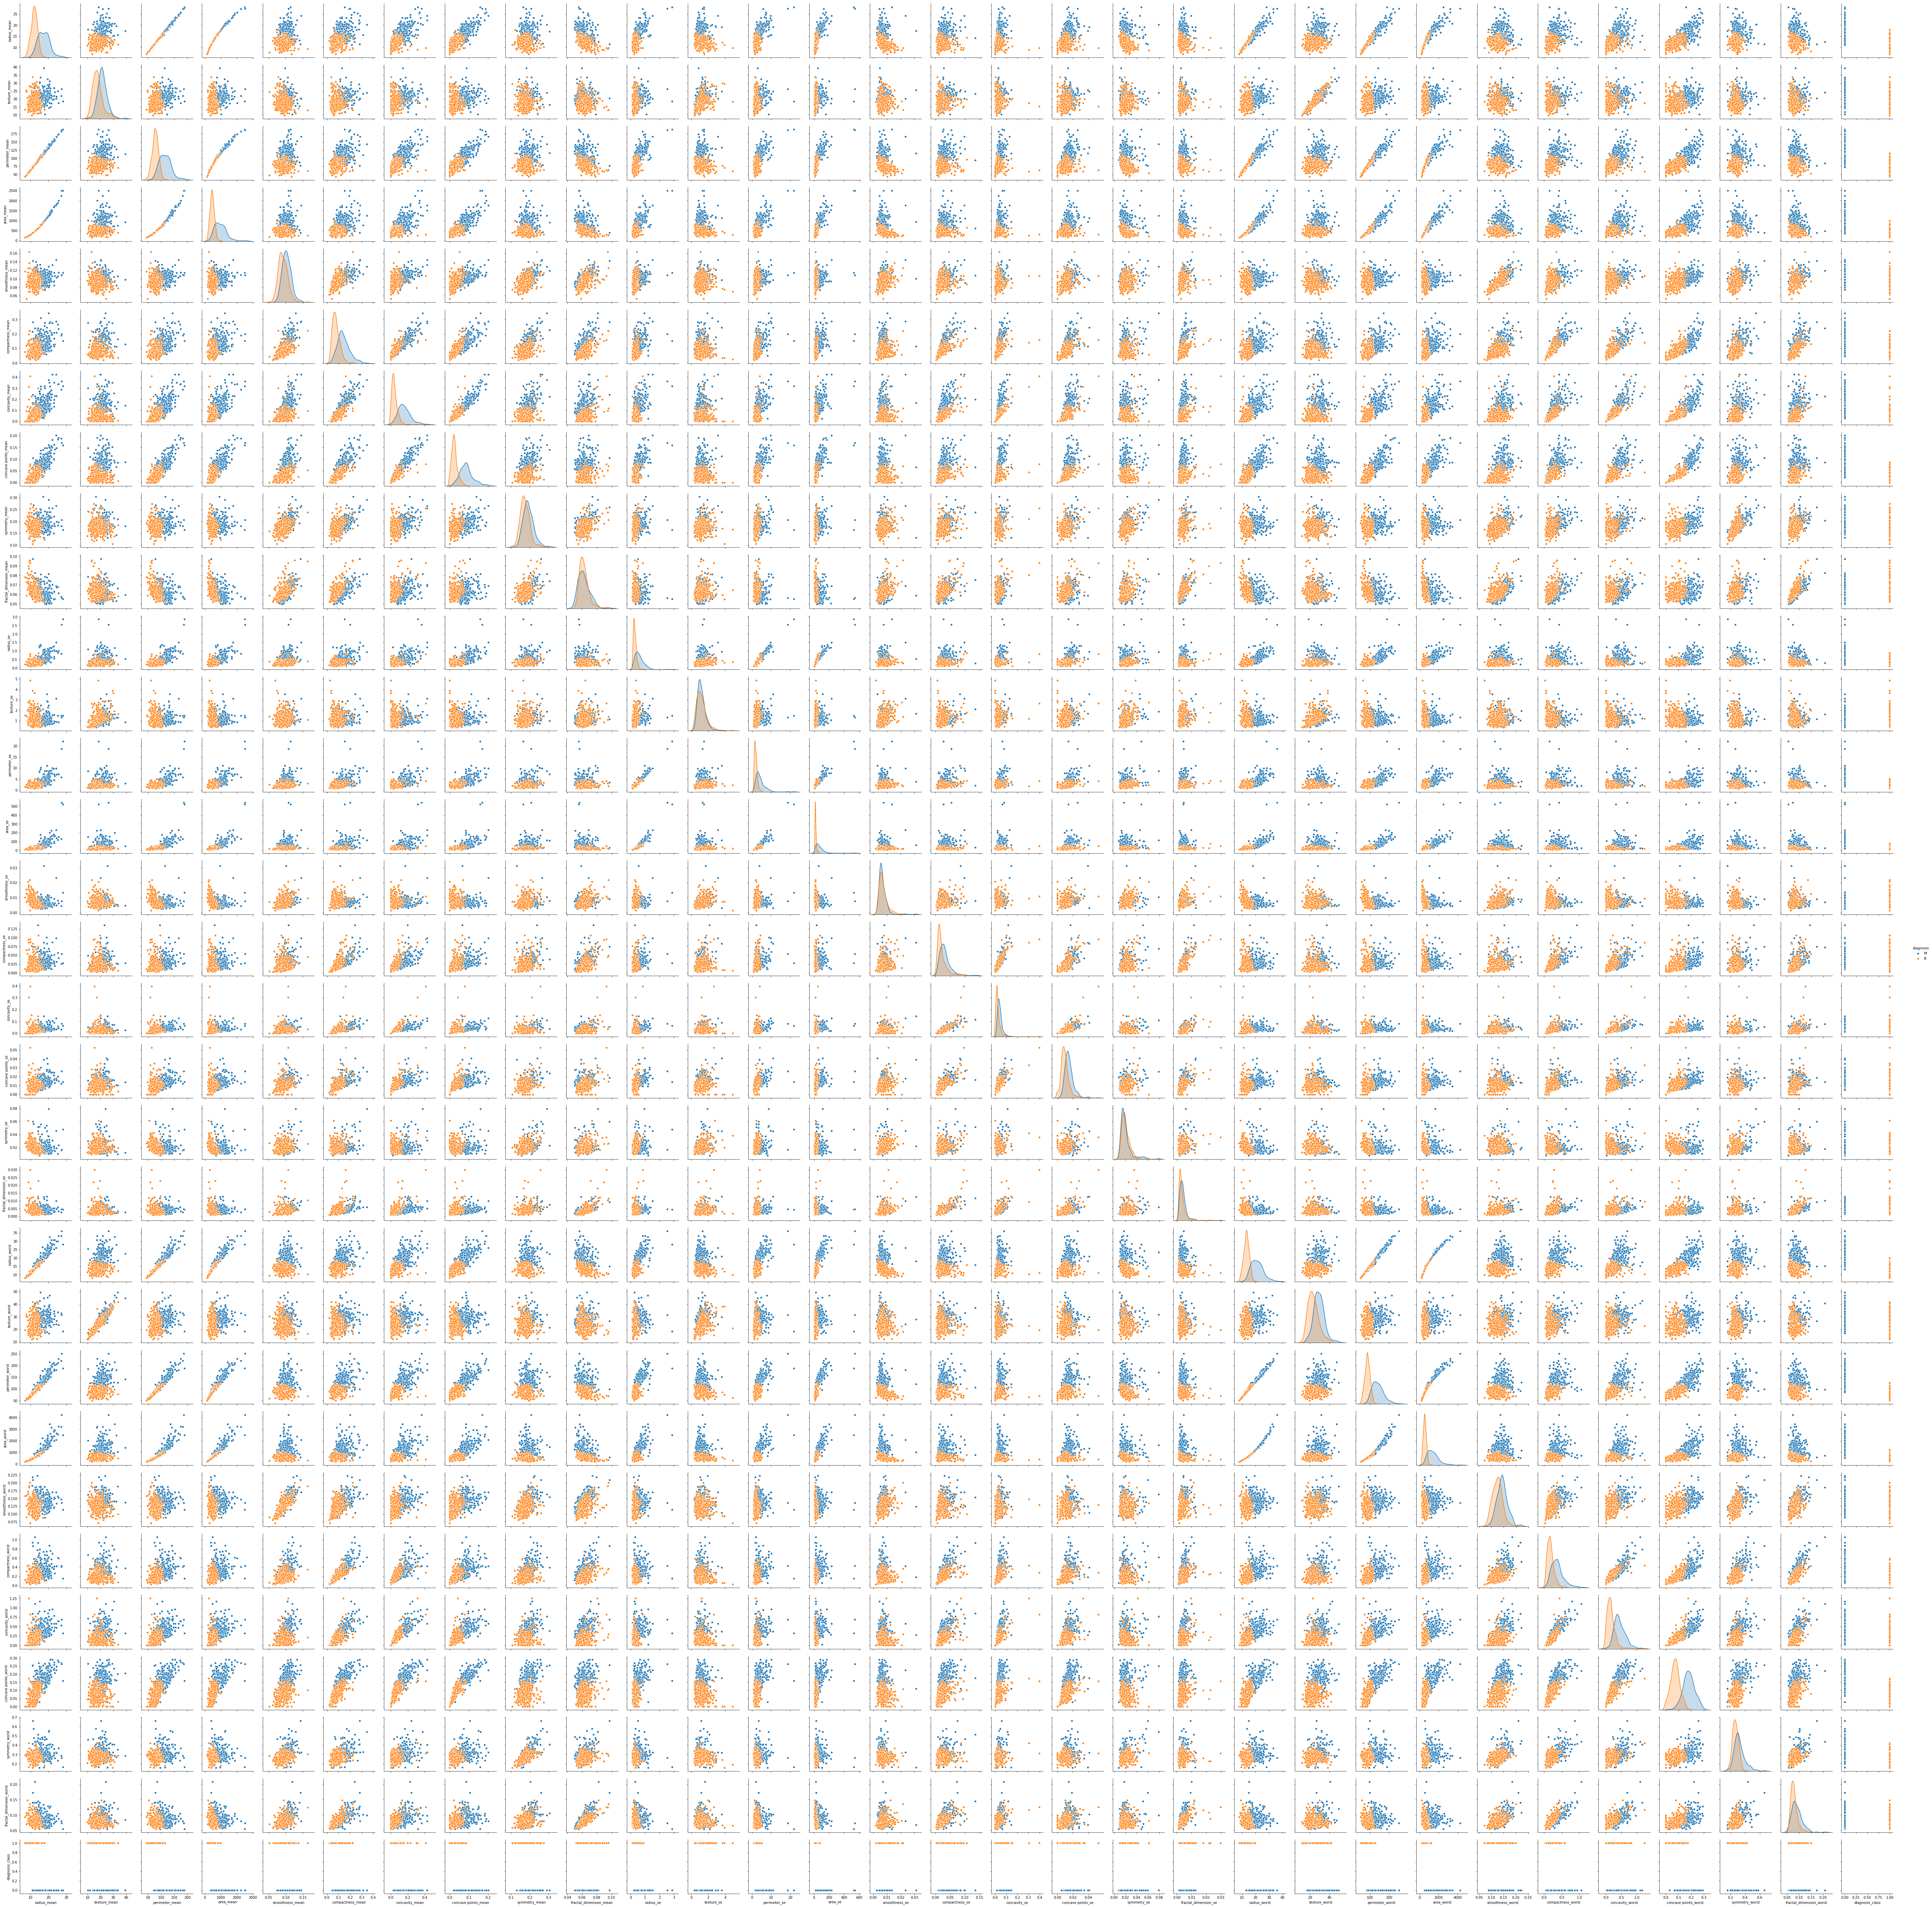

In [82]:
fig = sns.pairplot(data, hue='diagnosis')
plt.show()

M (0, злокачественный) - синий, B (1, доброкачественный) - оранжевый.

Почти для всех переменных mean и worst (кроме fractal_dimension и отчасти symmetry) характерны смещенные распределения в зависимости от диагноза, что говорит о возможности их эффективного использования при построении дерева решений. Для переменных se смещение менее характерно.

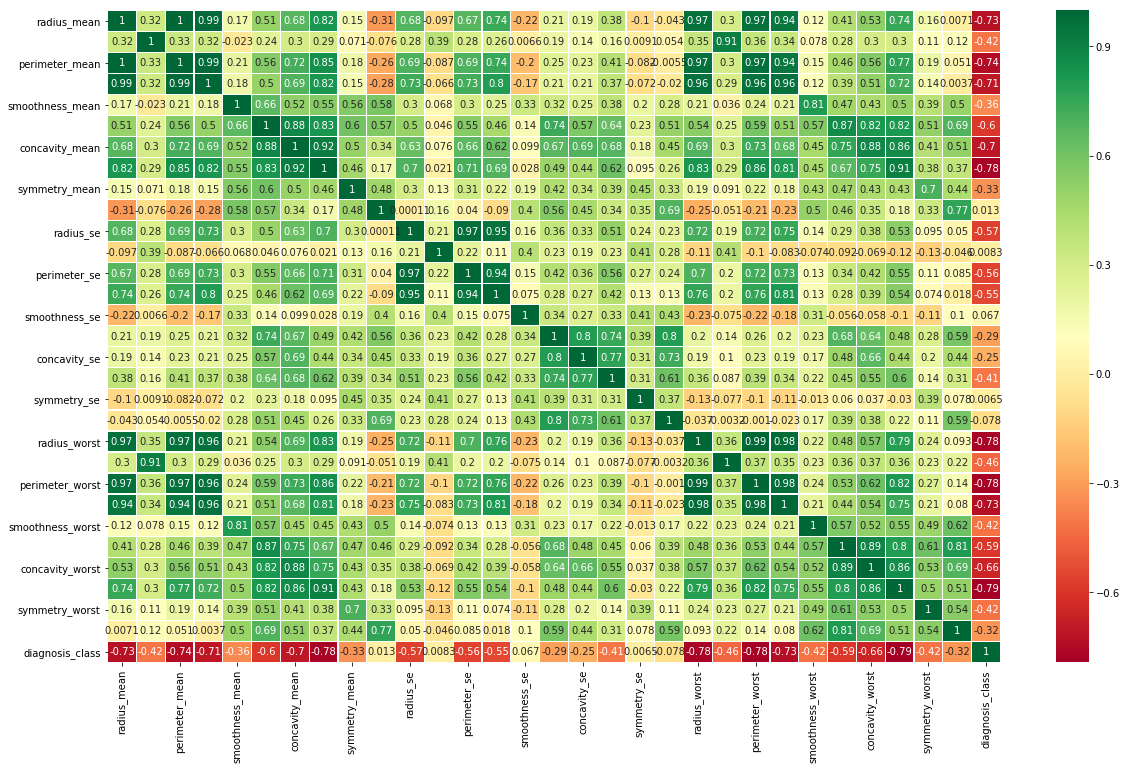

In [83]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Можно отметить выкокую положительную корреляцию между переменными mean и worst (от 0,7 до 0,97), при построении модели можно пользоваться только одной группой переменных. Также очень высокая положительная корреляция (от 0,98 до 1) между переменными radius и perimeter, area, так как послединие рассчитываются из радиуса. Высокой положительной корреляцией (от 0,8 до 0,92) связаны переменные compactness, concavity, concave points.

In [84]:
#Рассчитаем корреляцию переменных с бинарной целевой переменной diagnosis_class методом pointbiserialr.
data.drop(['diagnosis'], axis='columns', inplace=True)
for col in set(data.columns):
    print(col, sc.stats.pointbiserialr(data['diagnosis_class'], data[col])[0])

perimeter_mean -0.742635529725833
fractal_dimension_mean 0.01283760269843238
area_se -0.5482359402780244
perimeter_worst -0.7829141371737594
concave points_mean -0.7766138400204353
texture_worst -0.4569028213967983
fractal_dimension_se -0.07797241739025615
texture_se 0.008303332973877418
compactness_worst -0.590998237841792
smoothness_mean -0.35855996508593213
concavity_worst -0.6596102103692332
texture_mean -0.41518529984520447
compactness_se -0.29299924424885837
diagnosis_class 1.0
area_worst -0.733825034921051
smoothness_worst -0.4214648610664026
radius_mean -0.7300285113754564
radius_worst -0.7764537785950396
symmetry_se 0.006521755870647973
area_mean -0.7089838365853899
radius_se -0.5671338208247177
perimeter_se -0.5561407034314833
symmetry_worst -0.4162943110486191
smoothness_se 0.06701601057948732
symmetry_mean -0.33049855426254715
fractal_dimension_worst -0.32387218872082396
concavity_mean -0.6963597071719057
compactness_mean -0.5965336775082533
concavity_se -0.2537297659808303

## 5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

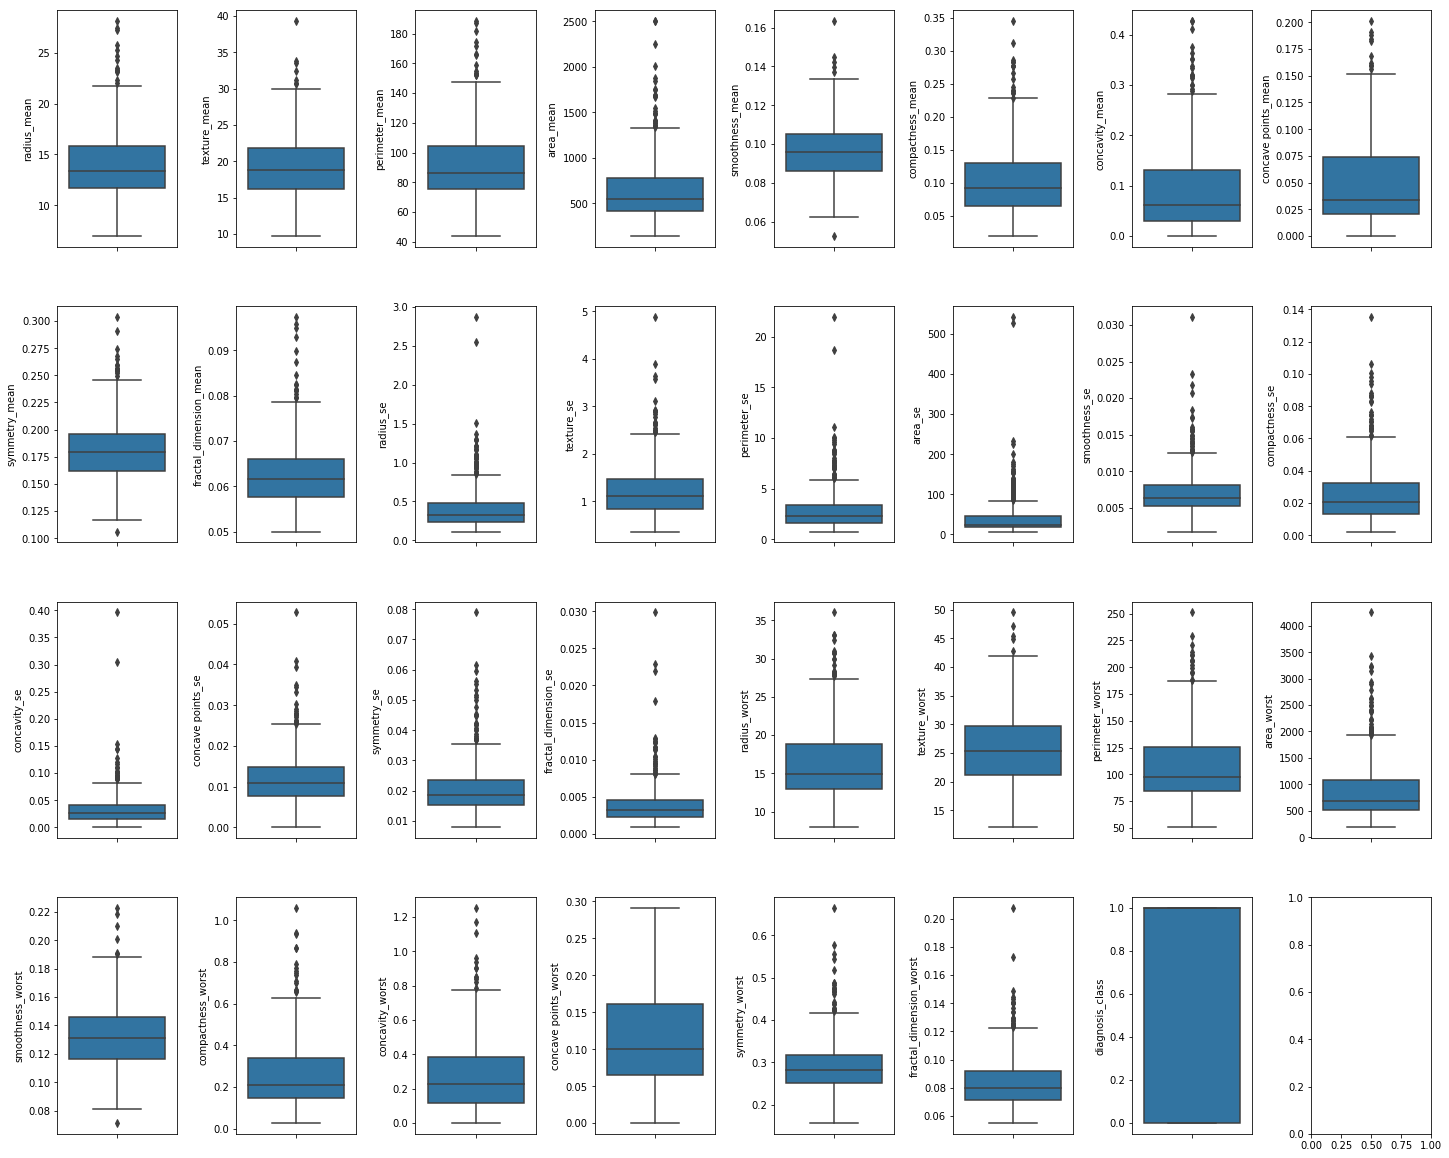

In [85]:
#Посмотрим выбросы в данных с помощью boxplot
fig, axs = plt.subplots(ncols=8, nrows=4, figsize=(20, 16))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [86]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Выбросы колонки %s = %.2f%%" % (k, perc))

Выбросы колонки radius_mean = 2.46%
Выбросы колонки texture_mean = 1.23%
Выбросы колонки perimeter_mean = 2.28%
Выбросы колонки area_mean = 4.39%
Выбросы колонки smoothness_mean = 1.05%
Выбросы колонки compactness_mean = 2.81%
Выбросы колонки concavity_mean = 3.16%
Выбросы колонки concave points_mean = 1.76%
Выбросы колонки symmetry_mean = 2.64%
Выбросы колонки fractal_dimension_mean = 2.64%
Выбросы колонки radius_se = 6.68%
Выбросы колонки texture_se = 3.51%
Выбросы колонки perimeter_se = 6.68%
Выбросы колонки area_se = 11.42%
Выбросы колонки smoothness_se = 5.27%
Выбросы колонки compactness_se = 4.92%
Выбросы колонки concavity_se = 3.87%
Выбросы колонки concave points_se = 3.34%
Выбросы колонки symmetry_se = 4.75%
Выбросы колонки fractal_dimension_se = 4.92%
Выбросы колонки radius_worst = 2.99%
Выбросы колонки texture_worst = 0.88%
Выбросы колонки perimeter_worst = 2.64%
Выбросы колонки area_worst = 6.15%
Выбросы колонки smoothness_worst = 1.23%
Выбросы колонки compactness_worst = 2.

Для большинства переменных размер выбросов незначительный.

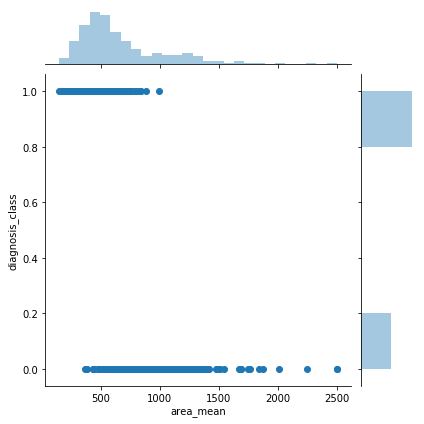

In [87]:
sns.jointplot(x='area_mean', y='diagnosis_class', 
              data=data, kind='scatter')

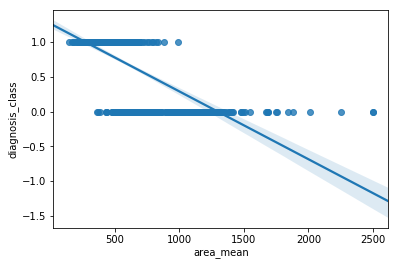

In [88]:
sns.regplot(x='area_mean', y='diagnosis_class', 
              data=data, fit_reg=True)

Графики показывают, что чем больше area_mean, тем больше вероятность диагноза M (0).

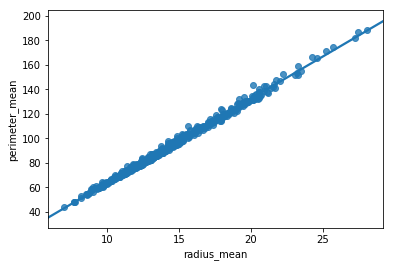

In [89]:
sns.regplot(x='radius_mean', y='perimeter_mean', 
              data=data, fit_reg=True)

График иллюстрирует наличие прямой зависимости между radius_mean и perimeter_mean.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D18E119B0>,
      dtype=object)

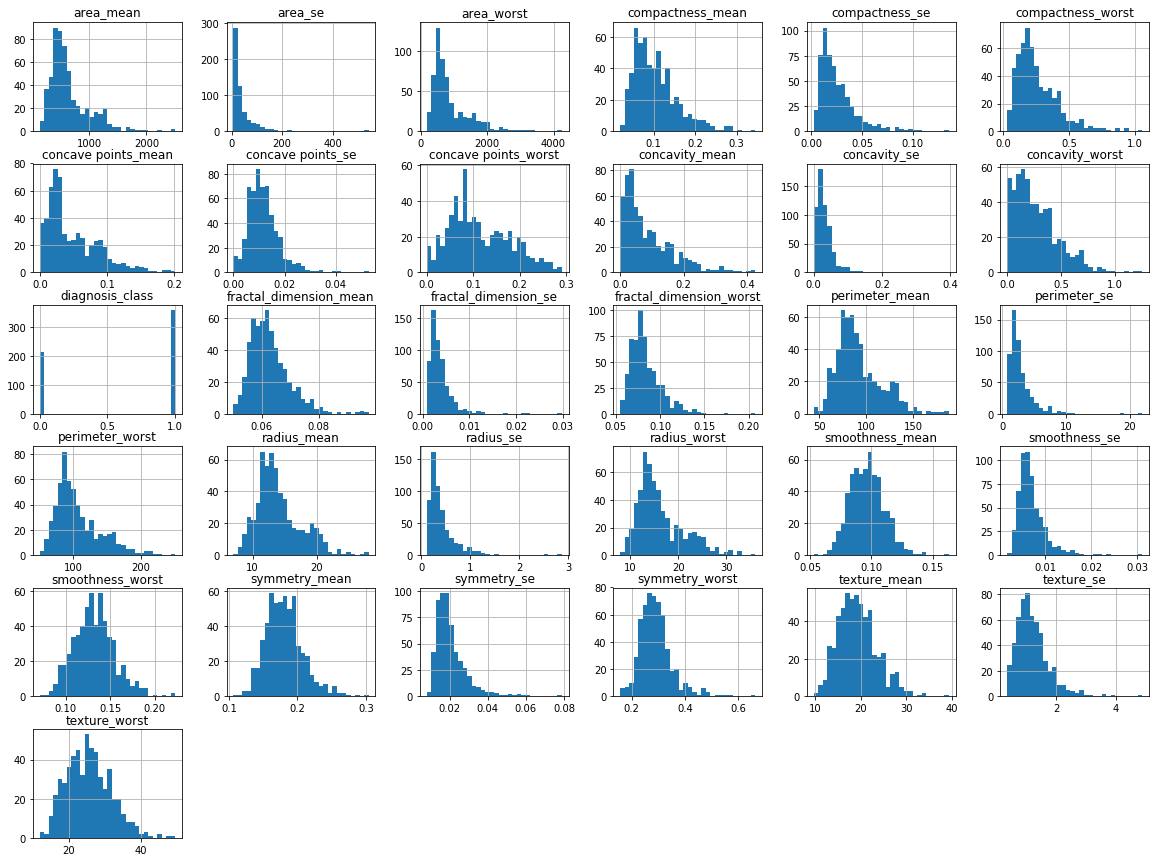

In [90]:
data.hist(bins=30, figsize=(20,15))

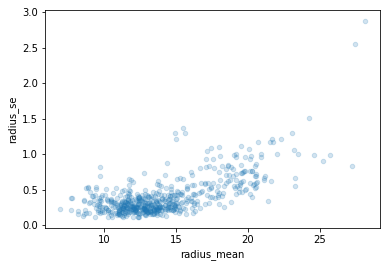

In [91]:
data.plot(kind="scatter", x="radius_mean", y="radius_se", alpha=0.2)

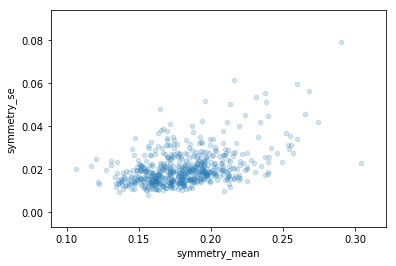

In [92]:
data.plot(kind="scatter", x="symmetry_mean", y="symmetry_se", alpha=0.2)

При возрастании значений radius_mean и symmetry_mean стандартное отклонение незначительно увеличивается.

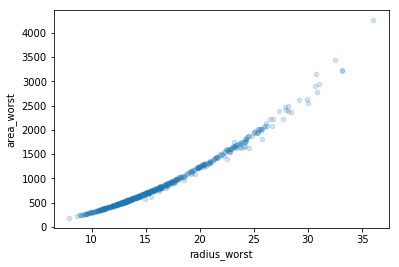

In [93]:
data.plot(kind="scatter", x="radius_worst", y="area_worst", alpha=0.2)

## 6. С помощью статистических методов проверить взаимосвязи между переменными.

Гипотеза 1: доброкачественность/злокачественность не зависит от средней площади.

In [94]:
diagnosis_B_area_mean=data.loc[data['diagnosis_class']==1, 'area_mean']
diagnosis_M_area_mean=data.loc[data['diagnosis_class']==0, 'area_mean']
H1= sts.ttest_ind(diagnosis_B_area_mean, diagnosis_M_area_mean)
print(H1)
H1[1]<0.05

Ttest_indResult(statistic=-23.938687235690992, pvalue=4.734564310307344e-88)


True

Гипотеза 1 отвергается, т.к. pvalue < 0.05. Доброкачественность/злокачественность зависит от средней площади.

Гипотеза 2: доброкачественность/злокачественность не зависит от texture.

In [95]:
diagnosis_B_texture_mean=data.loc[data['diagnosis_class']==1, 'texture_mean']
diagnosis_M_texture_mean=data.loc[data['diagnosis_class']==0, 'texture_mean']
H2= sts.ttest_ind(diagnosis_B_texture_mean, diagnosis_M_texture_mean)
print(H2)
H2[1]<0.05

Ttest_indResult(statistic=-10.86720108146434, pvalue=4.0586360478980736e-25)


True

Гипотеза 2 отвергается, т.к. pvalue < 0.05. Доброкачественность/злокачественность зависит от texture.

Гипотеза 3: доброкачественность/злокачественность не зависит от fractal dimension

In [96]:
diagnosis_B_fractal_dimension_mean=data.loc[data['diagnosis_class']==1, 'fractal_dimension_mean']
diagnosis_M_fractal_dimension_mean=data.loc[data['diagnosis_class']==0, 'fractal_dimension_mean']
H3= sts.ttest_ind(diagnosis_B_fractal_dimension_mean, diagnosis_M_fractal_dimension_mean)
print(H3)
H3[1]<0.05

Ttest_indResult(statistic=0.30571112978583087, pvalue=0.7599368037256238)


False

Гипотеза 3 не может быть отвергнута, т.к. pvalue > 0.05. Доброкачественность/злокачественность не зависит от fractal dimension.

## 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

In [97]:
#Можно объединить переменные, которые имеют корелляцию больше чем 70%
data0 = pd.read_csv('data_breast.csv')
data0.drop(['Unnamed: 32'], axis='columns', inplace=True)
corr_matrix1 = data0.corr().abs()
upper = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


In [98]:
#Можно исключить переменные с наименьшей корреляцией с целевой переменной diagnosis_class (по модулю меньше 0,2)
for col in set(data.columns):
    if abs(sc.stats.pointbiserialr(data['diagnosis_class'], data[col])[0]) <0.2:
        print(col)

fractal_dimension_mean
fractal_dimension_se
texture_se
symmetry_se
smoothness_se


## 8. Рассчитать Feature Selection для выбранных переменных.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

In [100]:
#Исключаем переменные с наименьшей корреляцией с целевой переменной diagnosis_class (по модулю меньше 0,2)
all_corr_col = []
for col in set(data.columns):
    if abs(sc.stats.pointbiserialr(data['diagnosis_class'], data[col])[0]) >=0.2:
        all_corr_col.append(col)
data1 = data[all_corr_col]
data1.head()

perimeter_mean  area_se  perimeter_worst  concave points_mean  \
0          122.80   153.40           184.60              0.14710   
1          132.90    74.08           158.80              0.07017   
2          130.00    94.03           152.50              0.12790   
3           77.58    27.23            98.87              0.10520   
4          135.10    94.44           152.20              0.10430   

   texture_worst  compactness_worst  smoothness_mean  concavity_worst  \
0          17.33             0.6656          0.11840           0.7119   
1          23.41             0.1866          0.08474           0.2416   
2          25.53             0.4245          0.10960           0.4504   
3          26.50             0.8663          0.14250           0.6869   
4          16.67             0.2050          0.10030           0.4000   

   texture_mean  compactness_se        ...          radius_se  perimeter_se  \
0         10.38         0.04904        ...             1.0950         8.589   
1         17.77         0.01308        ...             0.5435         3.398   
2         21.25         0.04006        ...             0.7456         4.585   
3         20.38         0.07458        ...             0.4956         3.445   
4         14.34         0.02461        ...             0.7572         5.438   

   symmetry_worst  symmetry_mean  fractal_dimension_worst  concavity_mean  \
0          0.4601         0.2419                  0.11890          0.3001   
1          0.2750         0.1812                  0.08902          0.0869   
2          0.3613         0.2069                  0.08758          0.1974   
3          0.6638         0.2597                  0.17300          0.2414   
4          0.2364         0.1809                  0.07678          0.1980   

   compactness_mean  concavity_se  concave points_worst  concave points_se  
0           0.27760       0.05373                0.2654            0.01587  
1           0.07864       0.01860                0.1860            0.01340  
2           0.15990       0.03832                0.2430            0.02058  
3           0.28390       0.05661                0.2575            0.01867  
4           0.13280       0.05688                0.1625            0.01885  

[5 rows x 26 columns]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data1.drop('diagnosis_class', axis = 1), data1['diagnosis_class'],\
                                                          test_size=0.3, shuffle=True, random_state=42)

In [102]:
clf = RandomForestClassifier(n_estimators=35,random_state=0).fit(X_train, y_train) 
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)

In [103]:
roc_auc_score(y_train, prediction_train)

1.0

In [104]:
roc_auc_score(y_test, prediction_test)

0.9636243386243386

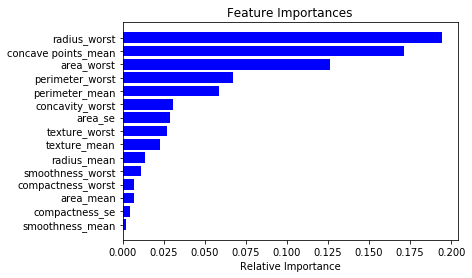

In [105]:
features = X_train.columns
importances = clf.feature_importances_[0:15]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

roc_auc_score = 1 для train говорит о "переобученности" модели.

In [106]:
#Объединяем переменные, которые имеют корелляцию больше чем 70%
data0 = pd.read_csv('data_breast.csv')
data0.drop(['Unnamed: 32'], axis='columns', inplace=True)
corr_matrix1 = data0.corr().abs()
upper = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


In [107]:
data0 = data0.drop(data0[to_drop], axis=1)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
texture_se                569 non-null float64
smoothness_se             569 non-null float64
symmetry_se               569 non-null float64
symmetry_worst            569 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.4+ KB


In [108]:
data0['diagnosis_class'] = data0.apply(diagnosis_class, axis=1)
data0.head()

id diagnosis  radius_mean  texture_mean  smoothness_mean  \
0    842302         M        17.99         10.38          0.11840   
1    842517         M        20.57         17.77          0.08474   
2  84300903         M        19.69         21.25          0.10960   
3  84348301         M        11.42         20.38          0.14250   
4  84358402         M        20.29         14.34          0.10030   

   compactness_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0           0.27760         0.2419                 0.07871      0.9053   
1           0.07864         0.1812                 0.05667      0.7339   
2           0.15990         0.2069                 0.05999      0.7869   
3           0.28390         0.2597                 0.09744      1.1560   
4           0.13280         0.1809                 0.05883      0.7813   

   smoothness_se  symmetry_se  symmetry_worst  diagnosis_class  
0       0.006399      0.03003          0.4601                0  
1       0.005225      0.01389          0.2750                0  
2       0.006150      0.02250          0.3613                0  
3       0.009110      0.05963          0.6638                0  
4       0.011490      0.01756          0.2364                0

In [109]:
data0.drop(['id'], axis='columns', inplace=True)

In [110]:
data0.drop(['diagnosis'], axis='columns', inplace=True)

In [111]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(data0.drop('diagnosis_class', axis = 1), data0['diagnosis_class'],\
                                                          test_size=0.3, shuffle=True, random_state=42)

In [112]:
clf = RandomForestClassifier(n_estimators=35,random_state=0).fit(X_train0, y_train0) 
prediction_train0 = clf.predict(X_train0)
prediction_test0 = clf.predict(X_test0)

In [113]:
roc_auc_score(y_train0, prediction_train0)

1.0

In [114]:
roc_auc_score(y_test0, prediction_test0)

0.9404761904761905

В модели осталось в два раза меньше переменных по сравнению с предыдущим вариантом, однако roc_auc_score для test снизился всего на 2%

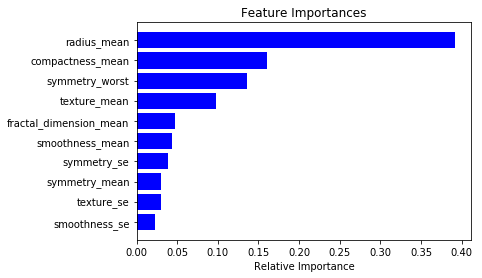

In [115]:
features0 = X_train0.columns
importances0 = clf.feature_importances_[0:15]

indices0 = np.argsort(importances0)

plt.title('Feature Importances')
plt.barh(range(len(indices0)), importances0[indices0], color='b', align='center')
plt.yticks(range(len(indices0)), [features0[i] for i in indices0])
plt.xlabel('Relative Importance')
plt.show()

## 9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

In [116]:
import xgboost
from sklearn.metrics import roc_curve

In [117]:
xgb = xgboost.XGBClassifier(max_depth=15, n_jobs=-1)
# xgb = DecisionTreeClassifier()
xgb.fit(X_train, y_train)
y_train_predict = xgb.predict_proba(X_train)[:, 1]
y_test_predict = xgb.predict_proba(X_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 3)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 3)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.994


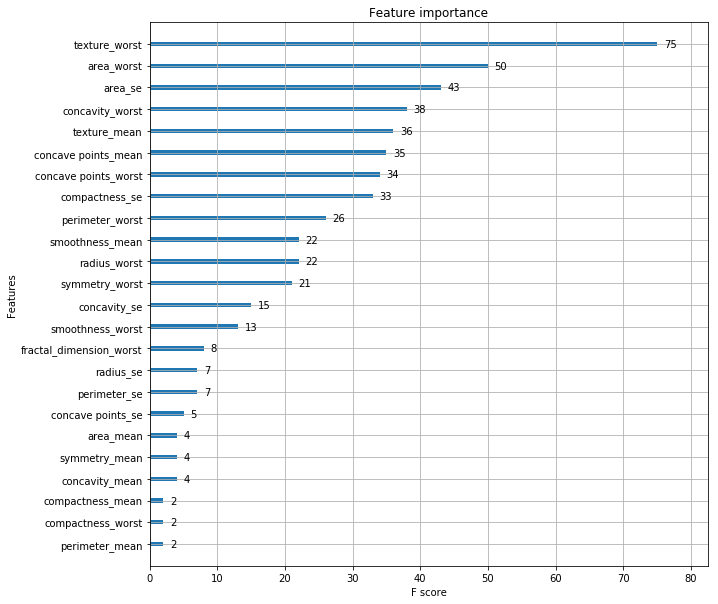

In [118]:
matplotlib.rcParams['figure.figsize'] = (10, 10)
xgboost.plot_importance(booster=xgb)
plt.savefig('tree_importance_test1.png')

## 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [119]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction_test)

0.9707602339181286

In [120]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.metrics import f1_score

f1_score(y_test, prediction_test, average='macro')  
#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

0.9682592716338123

In [121]:
f1_score(y_test, prediction_test, average='micro') 
#Calculate metrics globally by counting the total true positives, false negatives and false positives.

0.9707602339181286

In [122]:
f1_score(y_test, prediction_test, average='weighted')
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

0.970603923775359

In [123]:
f1_score(y_test, prediction_test, average=None) 
#This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned.

array([0.95934959, 0.97716895])

In [124]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score
precision_score(y_test, prediction_test, average='macro')  

0.9736486486486486

In [125]:
precision_score(y_test, prediction_test, average='micro') 

0.9707602339181286

In [126]:
precision_score(y_test, prediction_test, average='weighted')

0.9711000474158369

In [127]:
precision_score(y_test, prediction_test, average=None)  

array([0.98333333, 0.96396396])

In [128]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
recall_score(y_test, prediction_test, average='macro')  

0.9636243386243386

In [129]:
recall_score(y_test, prediction_test, average='micro') 

0.9707602339181286

In [130]:
recall_score(y_test, prediction_test, average='weighted')

0.9707602339181286

In [69]:
recall_score(y_test, prediction_test, average=None)

array([0.93650794, 0.99074074])

## 11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет